In [1]:
import pandas as pd
import numpy as np
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans

C:\Users\felab\anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [2]:
train = pd.read_excel("data/01_제공데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx", header=[0,1])
train.columns = ['_'.join(col).strip() if "Unnamed" not in col[1] else col[0] for col in train.columns.values]

In [3]:
#mySeries 만들기 - 수위 E데이터
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.preprocessing import MinMaxScaler

cnts = train['홍수사상번호'].value_counts()
tmp = pd.Series([0], index=[0])
cnts = cnts.append(tmp)
cnts = cnts.sort_index().cumsum()


mySeries=[]
for i in range(1,27):
    flood = train['데이터집단 1_수위(E지역)'][cnts[i-1]:cnts[i]]  # 홍수사상번호별 유입량 Series
    mySeries.append(flood)
    
myArrays=[]
for i in range(26):
    tmp = mySeries[i].to_numpy()
    myArrays.append(tmp)

X = to_time_series_dataset([myArrays[i] for i in range(26)])
X_normal = TimeSeriesScalerMeanVariance().fit_transform(X)

In [6]:
train.head()

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1_유역평균강수,데이터집단 1_강우(A지역),데이터집단 1_강우(B지역),데이터집단 1_강우(C지역),...,데이터 집단 5_강우(D지역),데이터 집단 5_수위(E지역),데이터 집단 5_수위(D지역),데이터 집단 6_유역평균강수,데이터 집단 6_강우(A지역),데이터 집단 6_강우(B지역),데이터 집단 6_강우(C지역),데이터 집단 6_강우(D지역),데이터 집단 6_수위(E지역),데이터 집단 6_수위(D지역)
0,1,2006,7,10,8,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.610
1,1,2006,7,10,9,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.600
2,1,2006,7,10,10,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.590
3,1,2006,7,10,11,302.812199,7.3,7,10,7,...,14,2.53,122.620,11.3,9,10,15,14,2.53,122.585
4,1,2006,7,10,12,384.783406,8.2,7,12,8,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575


In [4]:
cluster_k = 0
# 알맞은 k 정하기 - 실루엣 점수 사용
from tslearn.clustering import silhouette_score
labels = np.random.randint(2, size=26)
y = silhouette_score(X_normal, labels, metric="softdtw")
y

-0.07367244142555451

k = 3 일때 클러스터 결과

384.042 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.682 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.853 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.646 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.772 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.670 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.888 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.644 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.770 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.668 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.887 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.641 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.765 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.670 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.875 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.637 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.758 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.651 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.848 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.603 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.729 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.598 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.807 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.550 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.669 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.563 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.649 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.558 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.633 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.553 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.621 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.550 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.611 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.546 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.604 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.543 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.657 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.520 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.595 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.532 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.663 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.501 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.591 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.521 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.658 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.501 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.579 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.532 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.582 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

26.534 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

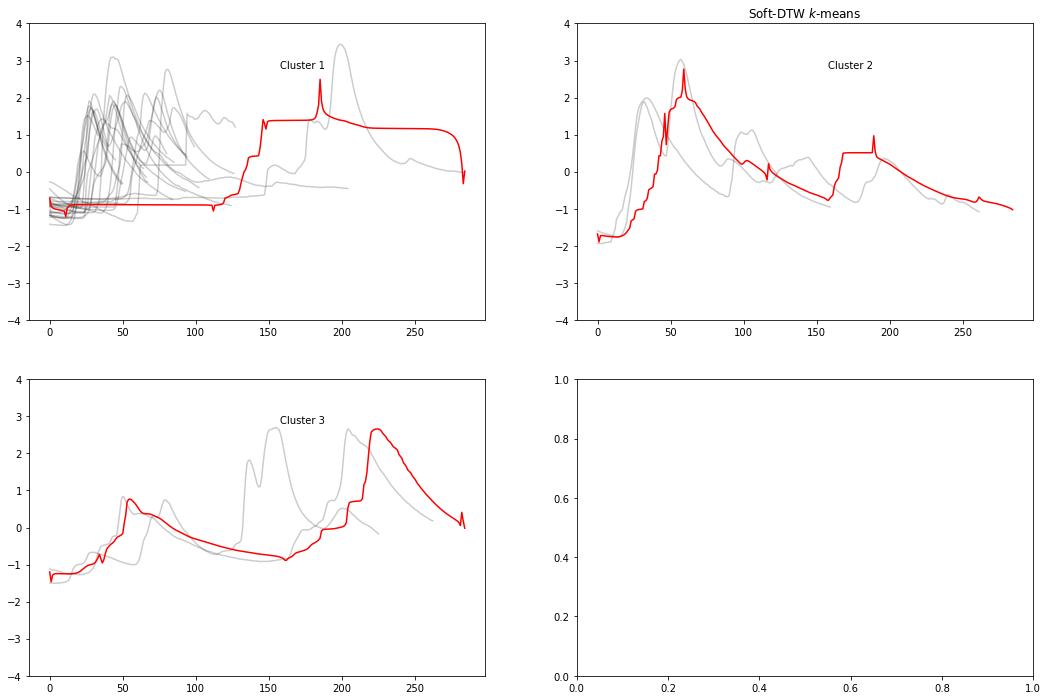

In [90]:
import matplotlib.pyplot as plt
cluster_k = 3 #K=3
sdtw_km = TimeSeriesKMeans(n_clusters=cluster_k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=0)
y_pred = sdtw_km.fit_predict(X_normal)

plt.subplots(2,2,figsize=(18,12))
for yi in range(cluster_k):
    plt.subplot(2,2, 1+yi)
    for xx in X_normal[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

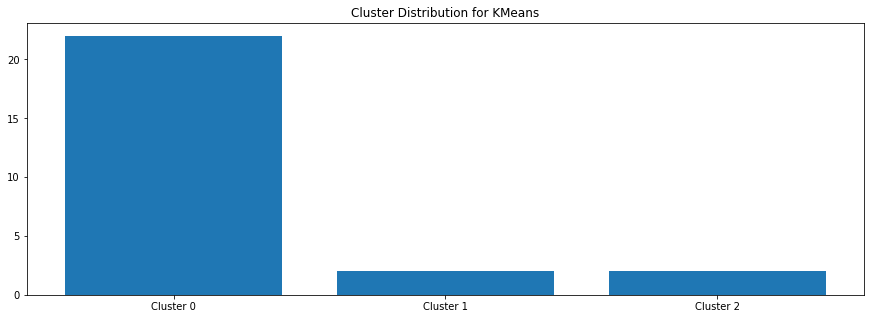

In [91]:
cluster_count = cluster_k
cluster_c = [len(y_pred[y_pred==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [92]:
labels3 =[]
labels3 = y_pred
df = pd.DataFrame(labels3, columns = ['3_수위(E지역)'])
all_scores = np.zeros((7,))
all_scores[0] = silhouette_score(X_normal, labels3, metric="softdtw")

k = 4 일때 클러스터 결과

344.217 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

14.706 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.710 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.781 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.771 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.783 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.755 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.782 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.759 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.779 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.758 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.776 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.755 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.773 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.752 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.769 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.749 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.765 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.746 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.762 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.743 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.758 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.740 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.755 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.737 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.752 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.734 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.748 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.731 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.745 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.728 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.742 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.725 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.739 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.721 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.736 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.718 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.733 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.714 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.730 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.711 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.727 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.708 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.723 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.706 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.720 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.704 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.717 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.702 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

13.715 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

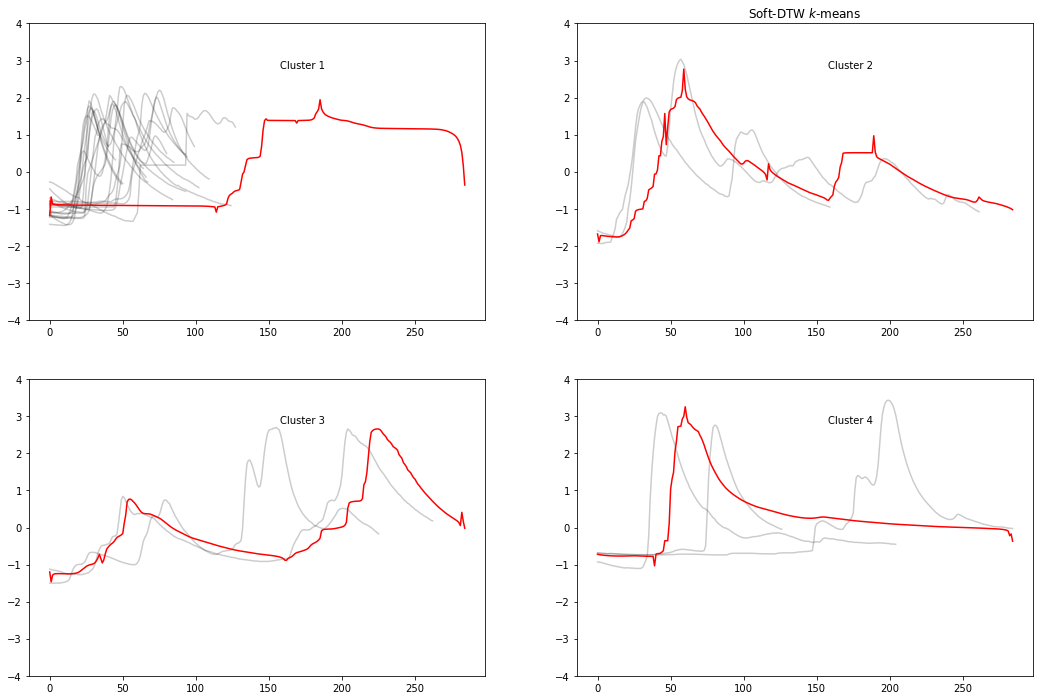

In [93]:
import matplotlib.pyplot as plt
cluster_k = 4 #K=4
sdtw_km = TimeSeriesKMeans(n_clusters=cluster_k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=0)
y_pred = sdtw_km.fit_predict(X_normal)

plt.subplots(2,2,figsize=(18,12))
for yi in range(cluster_k):
    plt.subplot(2,2, 1+yi)
    for xx in X_normal[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

In [94]:
cluster_c

[22, 2, 2]

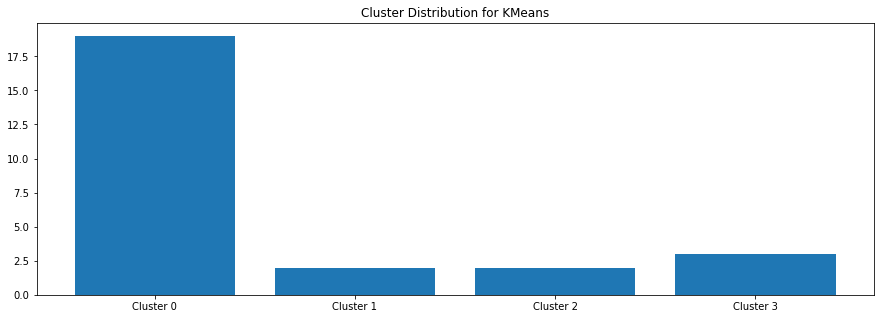

In [95]:
cluster_count = cluster_k
cluster_c = [len(y_pred[y_pred==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [96]:
labels4 =[]
labels4 = y_pred
df['4_수위(E지역)'] = labels4
all_scores[1] = silhouette_score(X_normal, labels4, metric="softdtw")

k = 5 일때 클러스터 결과

113.057 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

5.826 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.094 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.754 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.745 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.755 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.742 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.766 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.743 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.749 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.742 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.752 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.743 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.751 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.743 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.750 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.743 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.750 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.745 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.750 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.741 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.748 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.741 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.750 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.742 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.746 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.740 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.747 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.741 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.748 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.741 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.746 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.741 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.749 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.741 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.745 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.740 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.746 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.740 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.747 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.740 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.745 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.740 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.748 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.740 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.751 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.738 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.749 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.738 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

2.748 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

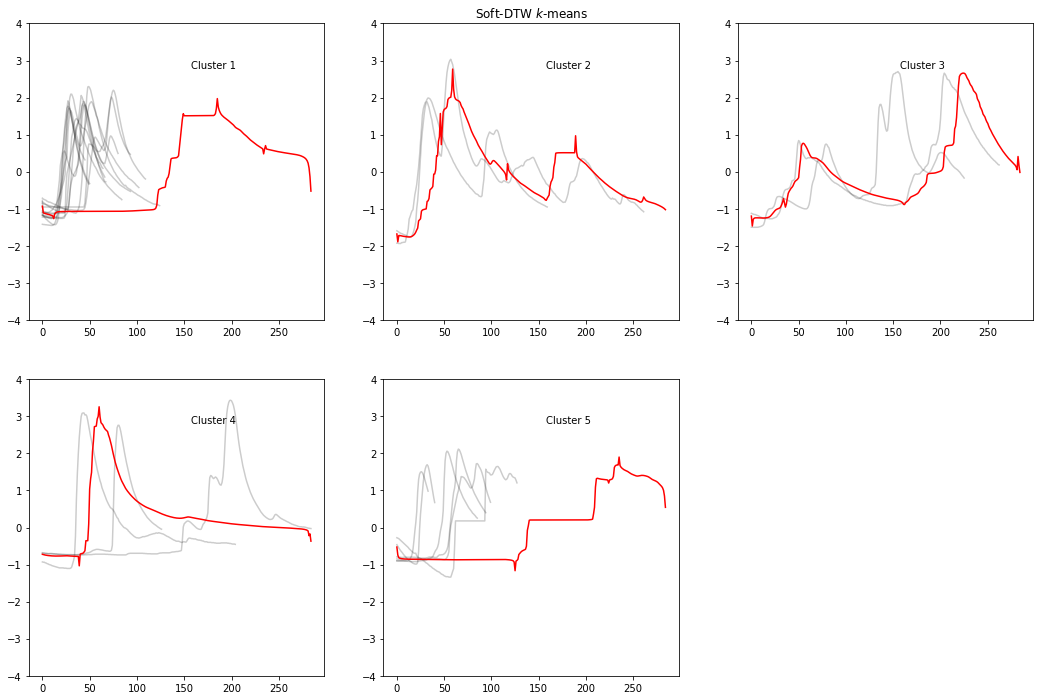

In [105]:
import matplotlib.pyplot as plt
cluster_k = 5 #K=5
sdtw_km = TimeSeriesKMeans(n_clusters=cluster_k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=0)
y_pred = sdtw_km.fit_predict(X_normal)

plt.subplots(2,2,figsize=(18,12))
for yi in range(cluster_k):
    plt.subplot(2,3, 1+yi)
    for xx in X_normal[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

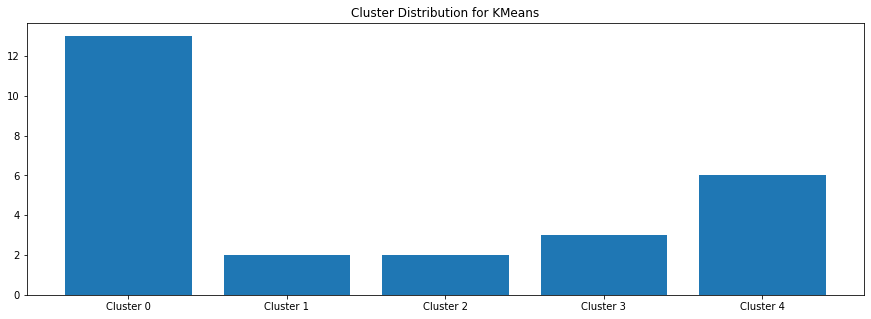

In [106]:
cluster_count = cluster_k
cluster_c = [len(y_pred[y_pred==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [107]:
labels5 =[]
labels5 = y_pred
df['5_수위(E지역)'] = labels5
all_scores[2] = silhouette_score(X_normal, labels5, metric="softdtw")

k = 6 일때 클러스터 결과

82.667 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

6.461 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.731 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.391 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.383 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.393 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.380 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.404 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.381 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.387 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.380 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.390 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.381 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.389 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.381 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.388 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.382 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.388 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.383 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.388 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.379 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.387 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.379 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.388 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.380 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.384 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.379 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.386 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.379 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.386 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.380 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.385 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.379 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.387 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.380 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.383 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.378 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.384 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.379 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.385 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.379 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.383 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.378 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.387 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.379 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.390 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.377 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.387 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.377 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.387 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

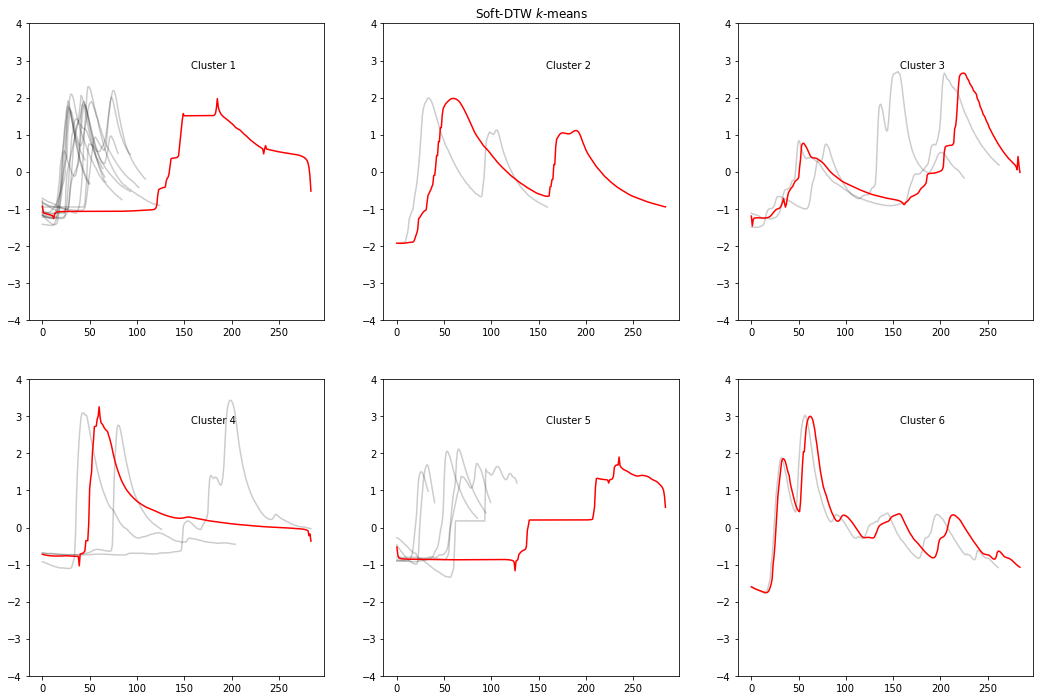

In [108]:
import matplotlib.pyplot as plt
cluster_k = 6 #K=6
sdtw_km = TimeSeriesKMeans(n_clusters=cluster_k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=0)
y_pred = sdtw_km.fit_predict(X_normal)

plt.subplots(2,2,figsize=(18,12))
for yi in range(cluster_k):
    plt.subplot(2,3, 1+yi)
    for xx in X_normal[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

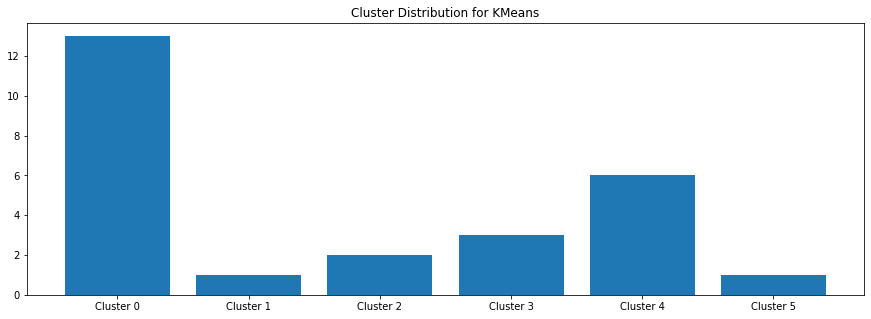

In [109]:
cluster_count = cluster_k
cluster_c = [len(y_pred[y_pred==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [110]:
labels6 =[]
labels6 = y_pred
df['6_수위(E지역)'] = labels6
all_scores[3] = silhouette_score(X_normal, labels6, metric="softdtw")

k = 7 일때 클러스터 결과

58.415 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

5.949 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.788 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.376 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.376 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.381 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.372 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.402 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.374 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.403 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.375 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.388 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.374 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.403 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.378 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.421 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.357 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.367 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.361 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.370 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.357 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.369 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.359 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.348 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.358 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.355 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.359 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.355 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.359 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.356 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.360 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.357 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.361 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.357 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.359 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.357 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.363 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.357 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.365 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.358 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.369 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.358 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.405 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.365 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.346 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.371 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.354 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.399 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.338 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.367 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

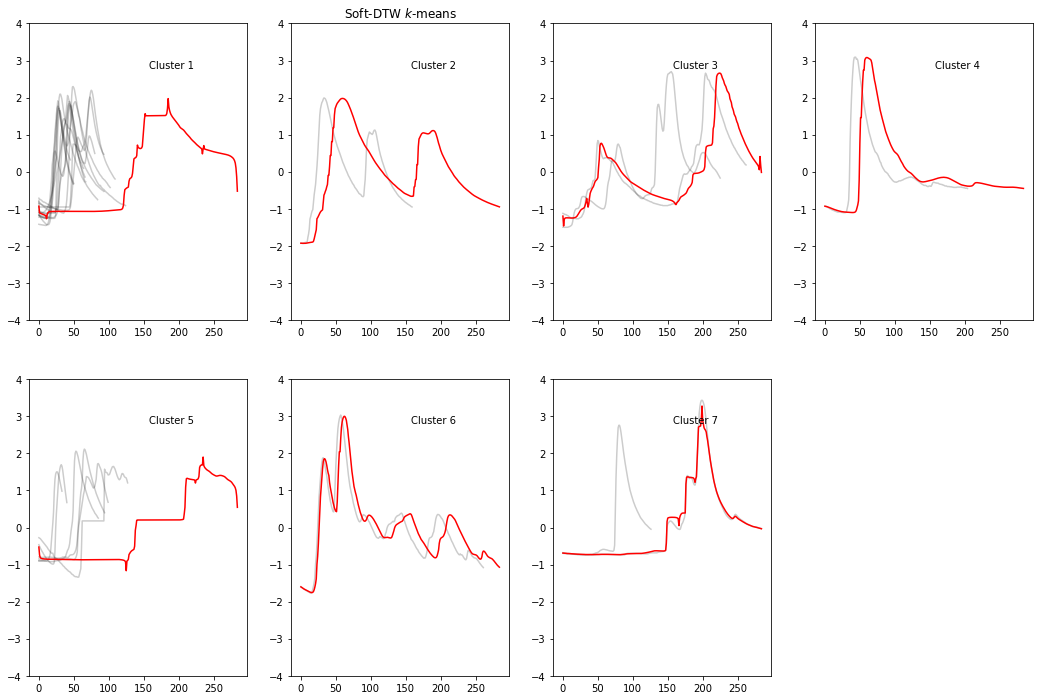

In [111]:
import matplotlib.pyplot as plt
cluster_k = 7 #K=7
sdtw_km = TimeSeriesKMeans(n_clusters=cluster_k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=0)
y_pred = sdtw_km.fit_predict(X_normal)

plt.subplots(2,2,figsize=(18,12))
for yi in range(cluster_k):
    plt.subplot(2,4, 1+yi)
    for xx in X_normal[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

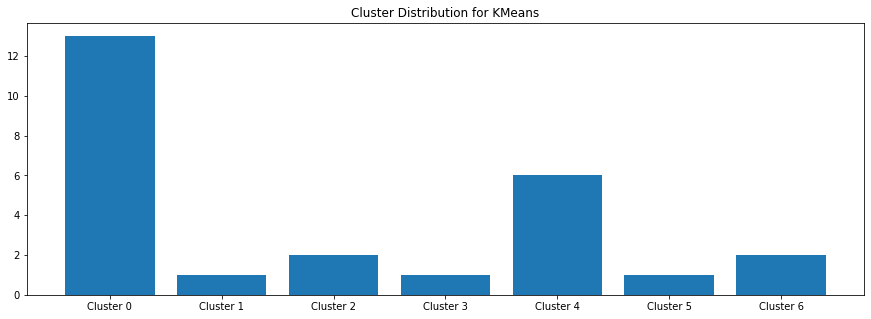

In [112]:
cluster_count = cluster_k
cluster_c = [len(y_pred[y_pred==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [113]:
labels7 =[]
labels7 = y_pred
df['7_수위(E지역)'] = labels7
all_scores[4] = silhouette_score(X_normal, labels7, metric="softdtw")

k = 8 일때 클러스터 결과

43.691 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

4.415 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.499 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.089 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.090 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.090 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.090 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.095 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.089 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.087 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.090 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.088 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.091 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.090 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.091 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.090 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.092 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.091 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.094 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.091 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.091 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.092 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.092 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.091 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.092 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.092 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.094 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.094 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.094 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.094 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.094 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.094 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.096 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.094 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.093 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

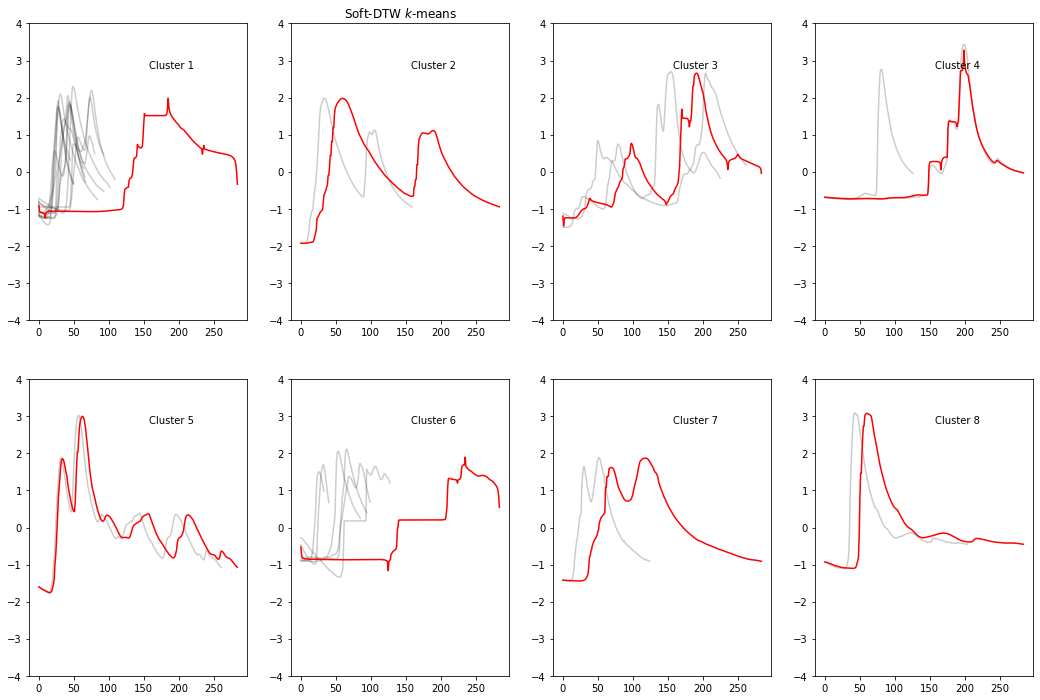

In [114]:
import matplotlib.pyplot as plt
cluster_k = 8 #K=8
sdtw_km = TimeSeriesKMeans(n_clusters=cluster_k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=0)
y_pred = sdtw_km.fit_predict(X_normal)

plt.subplots(2,2,figsize=(18,12))
for yi in range(cluster_k):
    plt.subplot(2,4, 1+yi)
    for xx in X_normal[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

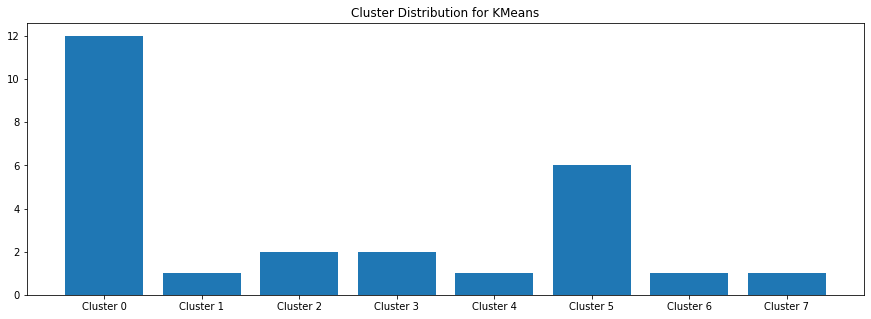

In [115]:
cluster_count = cluster_k
cluster_c = [len(y_pred[y_pred==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [116]:
labels8 =[]
labels8 = y_pred
df['8_수위(E지역)'] = labels8
all_scores[5] = silhouette_score(X_normal, labels8, metric="softdtw")

k = 9 일때 클러스터 결과

14.100 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.142 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.146 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.139 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.143 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.115 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.115 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.116 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.115 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.116 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.115 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.116 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.115 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.116 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.116 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.116 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.116 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.116 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.116 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.116 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.117 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.119 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.119 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.119 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.119 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.119 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.118 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.119 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.119 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.119 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.119 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.120 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.119 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

3.120 --> 

C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_ = numpy.array([to_time_series(d, remove_nans=True) for d in X_])
C:\Users\felab\anaconda3\lib\site-packages\tslearn\barycenters\softdtw.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

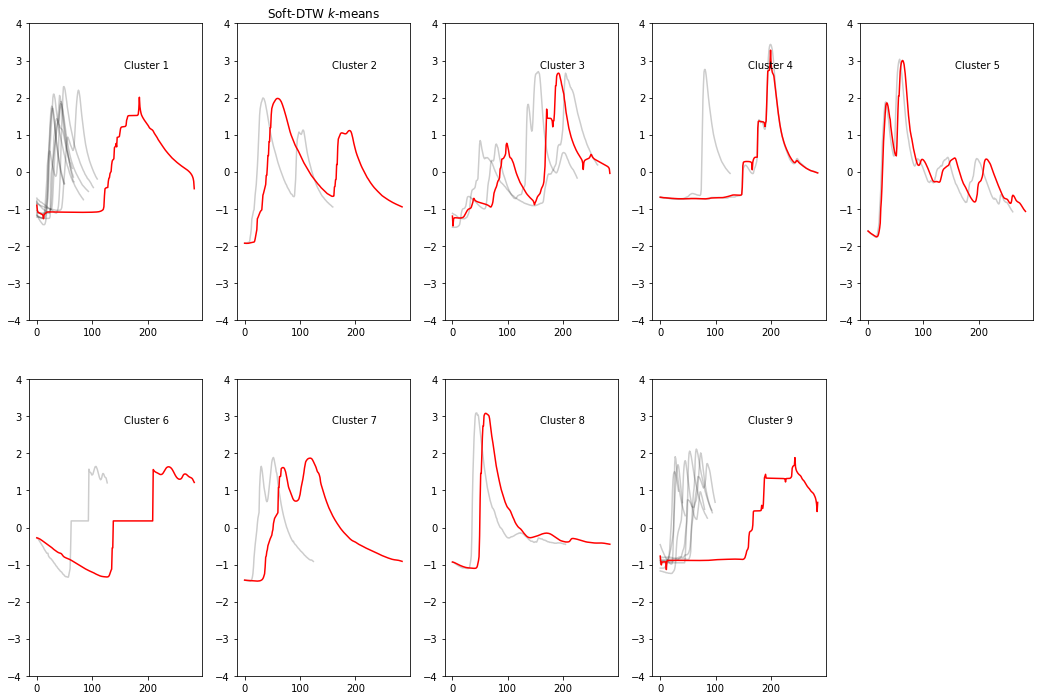

In [117]:
import matplotlib.pyplot as plt
cluster_k = 9 #K=9
sdtw_km = TimeSeriesKMeans(n_clusters=cluster_k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=0)
y_pred = sdtw_km.fit_predict(X_normal)

plt.subplots(2,2,figsize=(18,12))
for yi in range(cluster_k):
    plt.subplot(2,5, 1+yi)
    for xx in X_normal[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

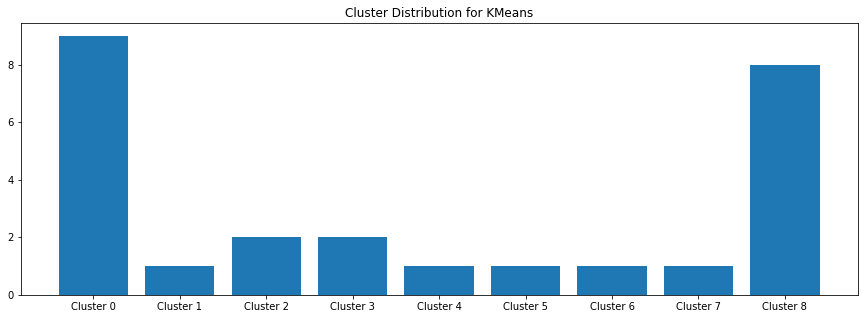

In [118]:
cluster_count = cluster_k
cluster_c = [len(y_pred[y_pred==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [119]:
labels9 =[]
labels9 = y_pred
df['9_수위(E지역)'] = labels9
all_scores[6] = silhouette_score(X_normal, labels9, metric="softdtw")

실루엣 점수를 통한 최적의 K 측정

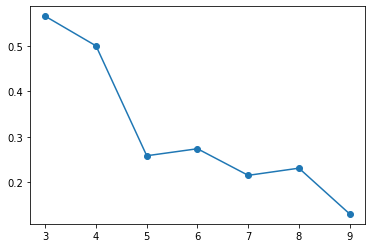

In [31]:
k_range = np.arange(3, 10, 1)
plt.plot(k_range, all_scores, marker='o')
plt.show()

실루엣 점수는 1에서 -1까지의 수치를 가지는데, +1에 가까우면 자신이 클러스터 안에 잘 속해있고 다른 클러스터와는 멀리 떨어져 있다는 뜻이다. 0과 가까울 수록 클러스터의 경계에 데이터가 위치해 있다는 뜻이고, -1에 가까우면 샘플이 잘못된 클러스터에 할당되었다는 뜻이다.

위에 따라 k=3 또는 k=4일때 비교적 클러스터링이 잘 되었다는 것을 알 수 있다.

In [120]:
k3_column = pd.DataFrame(train['홍수사상번호'], columns = ['홍수사상번호'])
k3_column["군집 결과"] = np.nan
for i in range(len(k3_column)):
  tmp = k3_column['홍수사상번호'][i]
  tmp = tmp - 1
  k3_column['군집 결과'][i] = labels3[tmp]
k3_column_final = pd.get_dummies(k3_column['군집 결과'])
k3_column_final
#k3_column_final 이용

<ipython-input-120-bb42c7a3dcd0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3_column['군집 결과'][i] = labels3[tmp]


,0.0,1.0,2.0
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
3046,0,1,0
3047,0,1,0
3048,0,1,0
3049,0,1,0


In [99]:
k3_column_final.to_csv('data/3_clustering_result.csv')

In [130]:
k4_column = pd.DataFrame(train['홍수사상번호'], columns = ['홍수사상번호'])
k4_column["군집 결과"] = np.nan
for i in range(len(k4_column)):
  tmp = k4_column['홍수사상번호'][i]
  tmp = tmp - 1
  k4_column['군집 결과'][i] = labels4[tmp]
k4_column_final = pd.get_dummies(k4_column['군집 결과'])
k4_column_final.to_csv('data/clustering/4_clustering_result.csv')
k4_column_final
#k4_column_final 이용

<ipython-input-130-11db8b011d06>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k4_column['군집 결과'][i] = labels4[tmp]


,0.0,1.0,2.0,3.0
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
3046,0,1,0,0
3047,0,1,0,0
3048,0,1,0,0
3049,0,1,0,0


In [132]:
k5_column = pd.DataFrame(train['홍수사상번호'], columns = ['홍수사상번호'])
k5_column["군집 결과"] = np.nan
for i in range(len(k5_column)):
  tmp = k5_column['홍수사상번호'][i]
  tmp = tmp - 1
  k5_column['군집 결과'][i] = labels5[tmp]
k5_column_final = pd.get_dummies(k5_column['군집 결과'])
k5_column_final.to_csv('data/clustering/5_clustering_result.csv')
k5_column_final
#k4_column_final 이용

<ipython-input-132-78beb78f41a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k5_column['군집 결과'][i] = labels5[tmp]


,0.0,1.0,2.0,3.0,4.0
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
3046,0,1,0,0,0
3047,0,1,0,0,0
3048,0,1,0,0,0
3049,0,1,0,0,0


In [131]:
k6_column = pd.DataFrame(train['홍수사상번호'], columns = ['홍수사상번호'])
k6_column["군집 결과"] = np.nan
for i in range(len(k6_column)):
  tmp = k6_column['홍수사상번호'][i]
  tmp = tmp - 1
  k6_column['군집 결과'][i] = labels6[tmp]
k6_column_final = pd.get_dummies(k6_column['군집 결과'])
k6_column_final.to_csv('data/clustering/6_clustering_result.csv')
k6_column_final
#k4_column_final 이용

<ipython-input-131-ac6206193380>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k6_column['군집 결과'][i] = labels6[tmp]


,0.0,1.0,2.0,3.0,4.0,5.0
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
3046,0,1,0,0,0,0
3047,0,1,0,0,0,0
3048,0,1,0,0,0,0
3049,0,1,0,0,0,0


## 결과 보기

군집 : k1 num_list : [ 2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 21 22 23 24 25]


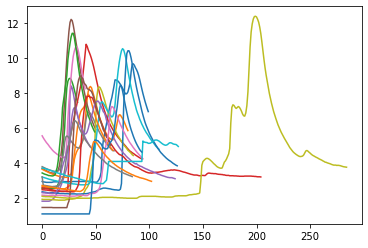

군집 : k2 num_list : [15 26]


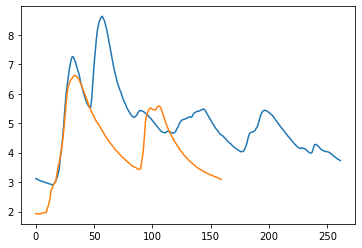

군집 : k3 num_list : [ 1 20]


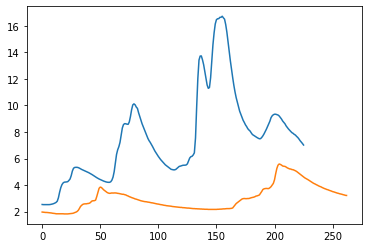

In [103]:
data = pd.read_excel("data/01_제공데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx", header=[0,1])
data.columns = ['_'.join(col).strip() if "Unnamed" not in col[1] else col[0] for col in data.columns.values]

k3_column_final

cluster_list = ['k1', 'k2', 'k3']
data[cluster_list] = k3_column_final

for k in cluster_list:
    data_k = data[data[k] == 1]
    num_list = data_k.홍수사상번호.unique()
    print(f"군집 : {k} num_list : {num_list}")
    for n in num_list:
        data_num = data_k[data_k.홍수사상번호 == n]
        plt.plot(data_num['데이터집단 1_수위(E지역)'].values)
    plt.show()

군집 : k1 num_list : [ 2  3  4  5  6  7  8  9 10 11 13 14 17 18 19 21 23 24 25]


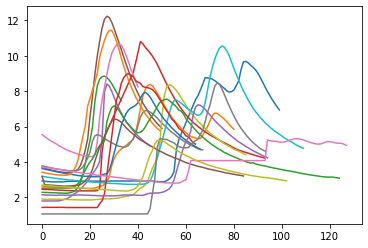

군집 : k2 num_list : [15 26]


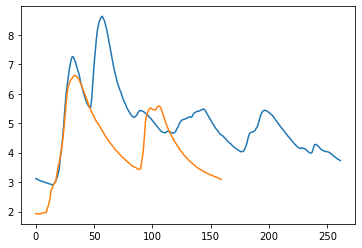

군집 : k3 num_list : [ 1 20]


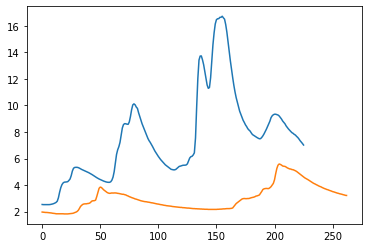

군집 : k4 num_list : [12 16 22]


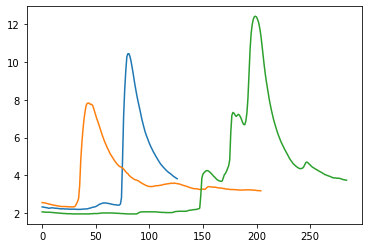

In [104]:
data = pd.read_excel("data/01_제공데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx", header=[0,1])
data.columns = ['_'.join(col).strip() if "Unnamed" not in col[1] else col[0] for col in data.columns.values]

k4_column_final

cluster_list = ['k1', 'k2', 'k3', 'k4']
data[cluster_list] = k4_column_final

for k in cluster_list:
    data_k = data[data[k] == 1]
    num_list = data_k.홍수사상번호.unique()
    print(f"군집 : {k} num_list : {num_list}")
    for n in num_list:
        data_num = data_k[data_k.홍수사상번호 == n]
        plt.plot(data_num['데이터집단 1_수위(E지역)'].values)
    plt.show()

군집 : k1 num_list : [ 3  5  6  7  9 11 13 14 17 18 21 24 25]


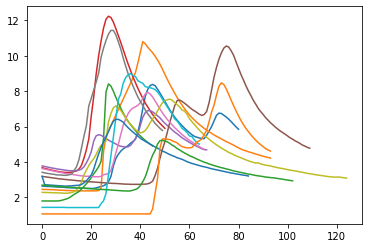

군집 : k2 num_list : [15 26]


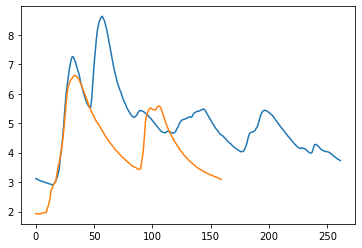

군집 : k3 num_list : [ 1 20]


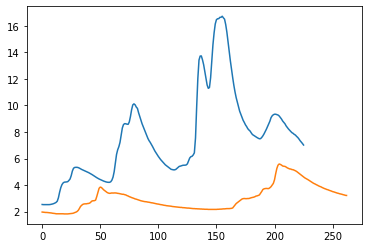

군집 : k4 num_list : [12 16 22]


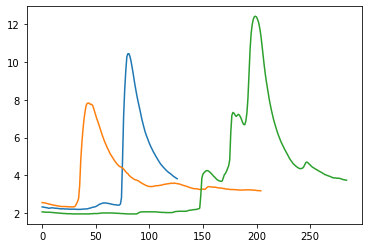

군집 : k5 num_list : [ 2  4  8 10 19 23]


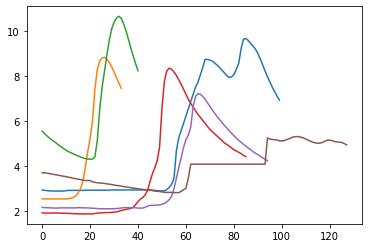

In [127]:
data = pd.read_excel("data/01_제공데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx", header=[0,1])
data.columns = ['_'.join(col).strip() if "Unnamed" not in col[1] else col[0] for col in data.columns.values]

k5_column_final

cluster_list = ['k1', 'k2', 'k3', 'k4', 'k5']
data[cluster_list] = k5_column_final

for k in cluster_list:
    data_k = data[data[k] == 1]
    num_list = data_k.홍수사상번호.unique()
    print(f"군집 : {k} num_list : {num_list}")
    for n in num_list:
        data_num = data_k[data_k.홍수사상번호 == n]
        plt.plot(data_num['데이터집단 1_수위(E지역)'].values)
    plt.show()

군집 : k1 num_list : [ 3  5  6  7  9 11 13 14 17 18 21 24 25]


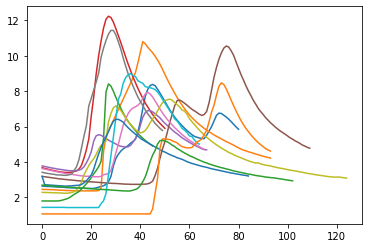

군집 : k2 num_list : [26]


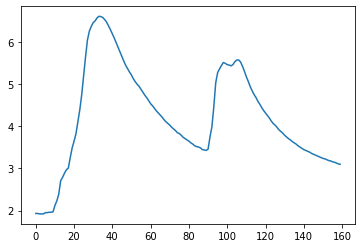

군집 : k3 num_list : [ 1 20]


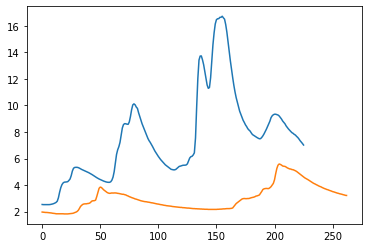

군집 : k4 num_list : [12 16 22]


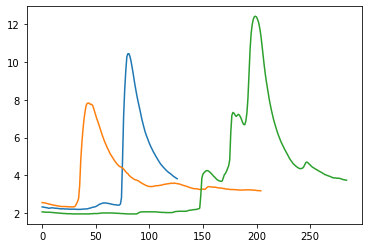

군집 : k5 num_list : [ 2  4  8 10 19 23]


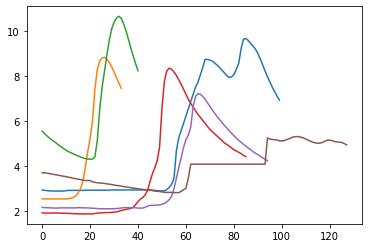

군집 : k6 num_list : [15]


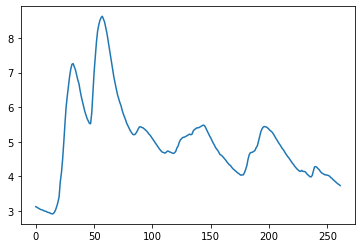

In [129]:
data = pd.read_excel("data/01_제공데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx", header=[0,1])
data.columns = ['_'.join(col).strip() if "Unnamed" not in col[1] else col[0] for col in data.columns.values]

k6_column_final

cluster_list = ['k1', 'k2', 'k3', 'k4', 'k5', 'k6']
data[cluster_list] = k6_column_final

for k in cluster_list:
    data_k = data[data[k] == 1]
    num_list = data_k.홍수사상번호.unique()
    print(f"군집 : {k} num_list : {num_list}")
    for n in num_list:
        data_num = data_k[data_k.홍수사상번호 == n]
        plt.plot(data_num['데이터집단 1_수위(E지역)'].values)
    plt.show()